In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
df = pd.read_csv('housing.csv')
df.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


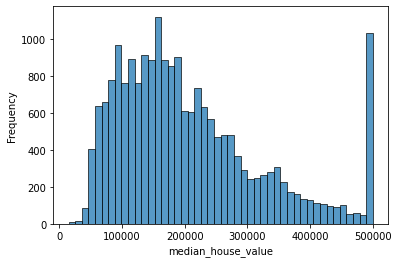

In [8]:
# plot distribution of median_house_value
sns.histplot(df['median_house_value'])
plt.ylabel("Frequency");

In [20]:
# subset 
df = df[(df['ocean_proximity'] == '<1H OCEAN') | (df['ocean_proximity'] == 'INLAND')]
df = df[['latitude',
'longitude',
'housing_median_age',
'total_rooms',
'total_bedrooms',
'population',
'households',
'median_income',
'median_house_value']]

In [21]:
df

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
701,37.64,-121.97,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
830,37.61,-121.99,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0
859,37.57,-121.97,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0
860,37.58,-121.96,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0
861,37.58,-121.98,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0
...,...,...,...,...,...,...,...,...,...
20635,39.48,-121.09,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,39.49,-121.21,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,39.43,-121.22,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,39.43,-121.32,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15687 entries, 701 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   latitude            15687 non-null  float64
 1   longitude           15687 non-null  float64
 2   housing_median_age  15687 non-null  float64
 3   total_rooms         15687 non-null  float64
 4   total_bedrooms      15530 non-null  float64
 5   population          15687 non-null  float64
 6   households          15687 non-null  float64
 7   median_income       15687 non-null  float64
 8   median_house_value  15687 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [23]:
# median
df['population'].describe()

count    15687.000000
mean      1466.317205
std       1180.389908
min          3.000000
25%        802.000000
50%       1195.000000
75%       1777.000000
max      35682.000000
Name: population, dtype: float64

In [27]:
# length of df 
n = len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)

np.random.seed(42)

idx = np.arange(n)

np.random.shuffle(idx)

df_val = df.iloc[idx[:n_val]]

df_test = df.iloc[idx[n_val:n_val + n_test]]

df_train = df.iloc[idx[n_val + n_test:]]

In [28]:
len(df_train),len(df_val),len(df_test)

(9413, 3137, 3137)

In [30]:
df_train.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
12752,38.62,-121.37,43.0,1077.0,199.0,447.0,182.0,3.0139,115600.0
13239,34.13,-117.66,17.0,3229.0,405.0,1289.0,407.0,6.3842,307100.0
11828,39.00,-121.00,4.0,170.0,23.0,93.0,27.0,10.9891,312500.0
13760,34.03,-117.17,33.0,4583.0,648.0,1760.0,638.0,6.3308,230600.0
12776,38.64,-121.41,38.0,1384.0,287.0,682.0,280.0,1.9167,64400.0


In [31]:
df_train = df_train.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)

In [32]:
df_train.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,38.62,-121.37,43.0,1077.0,199.0,447.0,182.0,3.0139,115600.0
1,34.13,-117.66,17.0,3229.0,405.0,1289.0,407.0,6.3842,307100.0
2,39.00,-121.00,4.0,170.0,23.0,93.0,27.0,10.9891,312500.0
3,34.03,-117.17,33.0,4583.0,648.0,1760.0,638.0,6.3308,230600.0
4,38.64,-121.41,38.0,1384.0,287.0,682.0,280.0,1.9167,64400.0


In [33]:

y_train = np.log1p(df_train['median_house_value'].values)
y_test = np.log1p(df_test['median_house_value'].values)
y_val = np.log1p(df_val['median_house_value'].values)


In [34]:
del df_train['median_house_value']

del df_test['median_house_value'] 

del df_val['median_house_value']

In [35]:
# python funtion to calculate for linear regression
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [59]:
# function to calculate for mean squared error 
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()

    return np.sqrt(mse)

In [65]:
# function to prepare the data ad fill with 0
def prepare_X(df):
    df = df.fillna(0)
    X = df.values
    return X

# find the linear regression of the training set 
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)
y_pred = w_0 + X_train.dot(w)

X_val = prepare_X(df_val)
y_pred_val = w_0 + X_val.dot(w)

round(rmse(y_val,y_pred_val),2)

0.34

In [66]:

# function to prepare the data ad fill with mean
def prepare_X(df):
    df = df.fillna(df.mean())
    X = df.values
    return X

# find the linear regression of the training set 
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)
y_pred = w_0 + X_train.dot(w)

round(rmse(y_train,y_pred),2)

X_val = prepare_X(df_val)
y_pred_val = w_0 + X_val.dot(w)

round(rmse(y_val,y_pred_val),2)

0.34

In [69]:
# regularization
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

# function to prepare the data ad fill with 0
def prepare_X(df):
    df = df.fillna(0)
    X = df.values
    return X

# find the linear regression of the training set 
X_train = prepare_X(df_train)


In [75]:
w_0, w = train_linear_regression_reg(X_train,y_train, r =0.0)

In [76]:
w

array([-2.79217781e-01, -2.64703979e-01,  1.39770133e-03, -1.16078237e-05,
        2.38248822e-04, -1.91382165e-04,  4.27354125e-04,  1.74510716e-01])

In [82]:

for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)

    print(r)
    y_pred = w_0 + X_train.dot(w)
    print('train', round(rmse(y_train, y_pred),2))

    X_val = prepare_X(df_val)
    y_pred = w_0 + X_val.dot(w)
    print('val', round(rmse(y_val, y_pred),5))
    print('\n')

0
train 0.34
val 0.33686


1e-06
train 0.34
val 0.33686


0.0001
train 0.34
val 0.33686


0.001
train 0.34
val 0.33686


0.01
train 0.34
val 0.33685


0.1
train 0.34
val 0.33692


1
train 0.34
val 0.33974


5
train 0.34
val 0.3424


10
train 0.34
val 0.34295




In [55]:
rmse(y_train,y_pred)

0.3361060911419213

In [44]:
y_pred

array([11.57572106, 12.35828048, 12.67903124, ..., 12.0576376 ,
       11.80239697, 12.48027112])

In [83]:
# question 5
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
rmse_vals = []
for seed in seeds:
    np.random.seed(seed)

    idx = np.arange(n)

    np.random.shuffle(idx)

    df_val = df.iloc[idx[:n_val]]

    df_test = df.iloc[idx[n_val:n_val + n_test]]

    df_train = df.iloc[idx[n_val + n_test:]]

    y_train = np.log1p(df_train['median_house_value'].values)
    y_test = np.log1p(df_test['median_house_value'].values)
    y_val = np.log1p(df_val['median_house_value'].values)

    del df_train['median_house_value']

    del df_test['median_house_value'] 

    del df_val['median_house_value']

    X_train = prepare_X(df_train)
    w_0, w = train_linear_regression(X_train, y_train)
    y_pred = w_0 + X_train.dot(w)

    X_val = prepare_X(df_val)
    y_pred_val = w_0 + X_val.dot(w)

    rmse_vals.append(rmse(y_val,y_pred_val))


In [86]:
round(np.std(rmse_vals),2)

0.01